In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
# Load the dataset from CSV file
dataset_path = 'BostonHousing.csv'
df = pd.read_csv(dataset_path)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Split features and target variable
X = df.drop('medv', axis=1).values
Y = df['medv'].values

In [7]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1,activation='linear')
])


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
model.fit(X_scaled, Y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 5ms/step - loss: 545.3698
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 445.7887
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 304.1879
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 157.2023
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 78.9761
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 50.6961
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 34.4427
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 27.3837
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 23.8963
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 22.1357
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 20.5889
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - loss: 19.4695
Epoch 13/100
16/16 [=

In [16]:
# Predict using the trained model
predictions = model.predict(X_scaled)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(Y, predictions)
print("\nMean Squared Error:", mse)

16/16 [==============================] - 0s 3ms/step

Mean Squared Error: 6.142417635147425


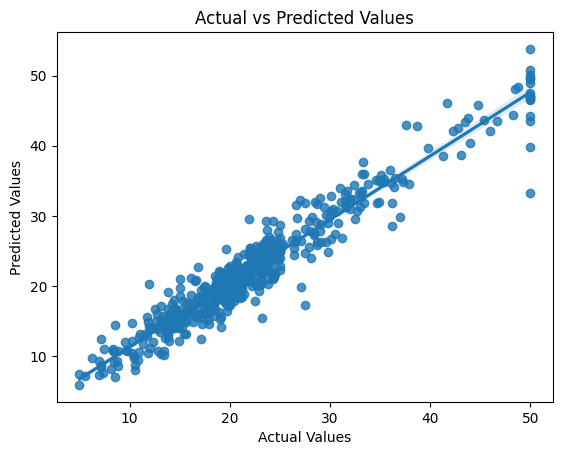

In [17]:
# Display the regression plot
sns.regplot(x=Y, y=predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()